In [1]:
from tensorflow.keras.datasets import fashion_mnist

import matplotlib.pyplot as plt

# Step1. 학습데이터 load

In [2]:
(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()

# Step2. 학습 데이터의 전처리
* feature
  * 2D tensor -> 1D tensor
  * [0-255] -> [0-1]
* label
  * one-hot encoding

In [3]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [5]:
x_train = x_train.reshape(-1, 28*28) # flatten
x_train = x_train / 255. # normalize

In [6]:
x_train.shape

(60000, 784)

In [ ]:
x_train[0]

In [9]:
x_test = x_test.reshape(-1,28*28)

x_test = x_test / 255.

In [10]:
x_test.shape

(10000, 784)

In [ ]:
x_test[0]

In [12]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_train = to_categorical(y = y_train, num_classes = 10)

y_test = to_categorical(y = y_test, num_classes = 10)

In [16]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [17]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Step3. Model 구조 설계

In [ ]:
# input shape(28*28,)
# output 10개의 클래스로 분류하는 모델 구현

In [18]:
from tensorflow.keras import models, layers

In [19]:
model = models.Sequential()

In [ ]:
# 이미 1D 이므로 flatten 안해도 됨
# fully connected layer

In [20]:
model.add(layers.Dense(units = 512, activation = 'relu',input_shape = (28*28,)))
model.add(layers.Dense(units = 10)) # 10개의 클래스에 대한 Logits(점수)를 반환

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


# Step4. Model의 학습에 필요한 설정 정보 세팅
* loss 함수 생성 시 model의 output이 logits 값임을 반영할 수 있게 값 설정
* lable data가 one-hot-encoding 되어 있는 걸 반영할 수 있게 설정 (sparse X)

In [22]:
from tensorflow import keras

In [23]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=2e-3),loss=keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

# Step5. Model에 학습 데이터를 연결하여 학습

In [ ]:
# step
# epoch 
# batch_size

In [24]:
history = model.fit(x=x_train, y=y_train, batch_size = 100, epochs=30, validation_split=0.2)

Epoch 1/30
480/480 [==============================] - 5s 3ms/step - loss: 0.5838 - accuracy: 0.7929 - val_loss: 0.4312 - val_accuracy: 0.8325
Epoch 2/30
480/480 [==============================] - 1s 3ms/step - loss: 0.3980 - accuracy: 0.8551 - val_loss: 0.4013 - val_accuracy: 0.8496
Epoch 3/30
480/480 [==============================] - 1s 3ms/step - loss: 0.3568 - accuracy: 0.8699 - val_loss: 0.3595 - val_accuracy: 0.8702
Epoch 4/30
480/480 [==============================] - 1s 3ms/step - loss: 0.3347 - accuracy: 0.8780 - val_loss: 0.3473 - val_accuracy: 0.8811
Epoch 5/30
480/480 [==============================] - 1s 3ms/step - loss: 0.3139 - accuracy: 0.8840 - val_loss: 0.3515 - val_accuracy: 0.8821
Epoch 6/30
480/480 [==============================] - 1s 3ms/step - loss: 0.3022 - accuracy: 0.8903 - val_loss: 0.3474 - val_accuracy: 0.8848
Epoch 7/30
480/480 [==============================] - 1s 3ms/step - loss: 0.2881 - accuracy: 0.8968 - val_loss: 0.3880 - val_accuracy: 0.8681
Epoch 

# Step6. Test 데이터 셋을 이용한 모델의 성능평가

In [25]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6379 - accuracy: 0.8857


# Appendix1. 학습된 모델에 예측 수행

In [26]:
predict = model.predict(x_test[0].reshape(1,-1))

In [27]:
predict # Logits 값

array([[-49.256824, -70.87801 , -45.39889 , -57.065395, -58.60812 ,
        -37.11868 , -56.895947, -29.073797, -52.560524,  -9.274671]],
      dtype=float32)

In [ ]:
import numpy as np

In [ ]:
np.argmax(predict)

9

In [ ]:
class_names[np.argmax(predict)]

'Ankle boot'

In [ ]:
x_test[0].shape

(784,)

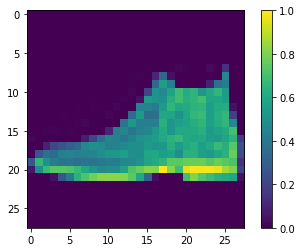

In [ ]:
plt.figure()

plt.imshow(x_test[0].reshape(28,28))

plt.colorbar()

plt.grid(False)

plt.show()

# Appendix2. 모델의 저장 및 복원

In [ ]:
model.save('my_model.h6')

INFO:tensorflow:Assets written to: my_model.h6/assets


In [ ]:
restore_model = models.load_model('my_model.h6')

In [ ]:
restore_model.predict(x_test[0].reshape(1,28*28))

array([[-58.632412, -81.688995, -68.25966 , -91.46948 , -78.27158 ,
        -54.877087, -59.177513, -40.48107 , -72.44621 , -17.383085]],
      dtype=float32)

# Appendix3. 모델의 학습 이력 시각화

In [ ]:
loss = history.history['loss']

acc = history.history['accuracy']

epochs = range(len(acc))

# Appendix5. 복원된 모델의 재학습

In [ ]:
restore_model.fit(x=x_train,y=y_train,epochs=3,batch_size=128)

Epoch 1/3
469/469 [==============================] - 2s 3ms/step - loss: 0.2521 - accuracy: 0.9287
Epoch 2/3
469/469 [==============================] - 1s 3ms/step - loss: 0.2192 - accuracy: 0.9321
Epoch 3/3
469/469 [==============================] - 1s 3ms/step - loss: 0.2066 - accuracy: 0.9352
